## `array.array` and `np.array`

### array.array

The list type is nice and very flexible, but if you need to store many many (millions) of floating point variables, array.array is a better option. It stores just the bytes representing the type, so its just like a contiguous C array of things in RAM, and also just like a numpy array. 

`array.array` IS mutable, and you dont need to allocate ahead of time (reallocation will be done).

The constructor is: 

`array(typecode [, initializer]) -- create a new array`



In [31]:
from array import array
from random import random
#generator expression instead of list comprehension
floats_aa=array('d', (random() for i in range(10**8)))

In [32]:
floats_aa.itemsize

8

In [33]:
type(floats_aa), floats_aa[5]

(array.array, 0.06347468552019986)

### Numpy arrays

I'll refer you to their quickstart in case you have not already worked with them. Bottom line: they need a size!

https://docs.scipy.org/doc/numpy-dev/user/quickstart.html


In [35]:
import numpy as np
af_array = np.array([1,2,3], dtype="float64")

In [36]:
af_array

array([ 1.,  2.,  3.])

In [37]:
af_array.dtype, af_array.shape, af_array.ndim

(dtype('float64'), (3,), 1)

In [41]:
af_array_2 = np.ones(shape=10, dtype=int)

In [42]:
af_array_2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [43]:
af_array_3 = np.ones(shape=(10,), dtype="float32")

In [44]:
af_array_3

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.], dtype=float32)

## Where do trees arise

A tree is:

- a hierarchical data structure that has a bunch of items,
- each of which may have a value
- some of which may point to other such items, and some that dont (leaf nodes)
- each item is pointed to by exactly one other item, with the sole exception of the root.


Trees arise everywhere:

- in parsing of code
- evolutionary trees in biology
- language origin trees
- unix file system
- html tags on this page

Just like with lists, one can consider looking at a tree in two ways: a collection of nodes, or a tree with a root and multiple sub-tree's.


### Parsing into a Tree

Consider writing a small calculator language, which takes calculator expressions written in an prefix format, and calculates them for us.

Parsing is the idea of generating an expression tree from code text. A parser has 2 components:

1. a lexical analyser or lexer which converts code into tokens
2. a syntactic analyzer which constructs an expression tree from these tokens

Here is code for our infix calculator. We have no variables, and no precedence, to keep things simple. Brackets need to be explicit.

`(+ 1 (* 2 3)) = 7`

 We will need to **parse** this expression: the output will be a parse tree. For simplicity we will assume that all operations are binary, and thus represent the parse tree is a binary tree...

In [1]:
from IPython.display import Image

In [2]:
import uuid
class BinaryTree:
    def __init__(self, value, parent=None):
        self.value = value
        self.parent = parent
        self.uuid= uuid.uuid4()
        self.left = None
        self.right = None

    def addLeftChild(self, value): 
        n = BinaryTree(value, self)
        self.left = n
        return n
        
    def addRightChild(self, value):
        n = BinaryTree(value, self)
        self.right = n
        return n
        
    def hasLeftChild(self):
        return self.left != None

    def hasRightChild(self):
        return self.right != None

    def isLeftChild(self):
        return self.parent and self.parent.left == self

    def isRightChild(self):
        return self.parent and self.parent.right == self

    def isRoot(self):
        return not self.parent

    def isLeaf(self):
        return not (self.right or self.left)
    
    def preorder(self):
        if self.isLeftChild():
            yield (self.parent.value, self.parent.uuid, self.value, self.uuid, "left")
        elif self.isRightChild():
            yield (self.parent.value, self.parent.uuid, self.value, self.uuid, "right")
        if self.hasLeftChild():
            for v in self.left.preorder():
                yield v
        if self.hasRightChild():
            for v in self.right.preorder():
                yield v


In [3]:
junk = BinaryTree(5)
l = junk.addLeftChild(3)
r = junk.addRightChild(31)
l.addLeftChild(8)
l.addRightChild(3)
r.addRightChild(22)

In [4]:
junk.hasLeftChild(), junk.left, junk.left.value

(True, <__main__.BinaryTree at 0x10585e8d0>, 3)

In [5]:
l.value, l.right.value

(3, 3)

In [6]:
junk.preorder()

<generator object BinaryTree.preorder at 0x1052ce990>

In [9]:
import subprocess
def plotbtree(btree, fname):
    start="""
    digraph G {
    nodesep=0.3;
    ranksep=0.2;
    margin=0.1;
    node [shape=circle];
    edge [arrowsize=0.8];
    """
    end = "}"
    assert btree.isRoot(), "Must start at root"
    lines=""
    labeldict={}
    for t in btree.preorder():
        if not t[1] in labeldict:
            labeldict[t[1]]=t[0]
        if not t[3] in labeldict:
            labeldict[t[3]]=t[2]
        lines = lines + "\"{}\" -> \"{}\"[side={}];\n".format(t[1],t[3],t[4])
    end="\n".join(["\"{}\"[label=\"{}\"]".format(k,v) for (k, v) in labeldict.items()])+end
    start = start + lines +end
    with open(fname+".dot","w") as fd:
        fd.write(start)
    #comment out if needed
    subprocess.call(['./treeplot.sh', fname])

You can plot resultant graphs online as well: http://sandbox.kidstrythisathome.com/erdos/

In [10]:
plotbtree(junk, "junk")

In [11]:
!cat junk.dot


    digraph G {
    nodesep=0.3;
    ranksep=0.2;
    margin=0.1;
    node [shape=circle];
    edge [arrowsize=0.8];
    "09f537a7-1c88-4300-9e26-964d3d8e77fc" -> "d66b4154-38d3-4301-8e67-b3fc732c6777"[side=left];
"d66b4154-38d3-4301-8e67-b3fc732c6777" -> "8b6dbfd4-0802-4bb7-a444-9f0e0a297abe"[side=left];
"d66b4154-38d3-4301-8e67-b3fc732c6777" -> "a0653803-1abd-41dd-9aba-0a7d32974f5b"[side=right];
"09f537a7-1c88-4300-9e26-964d3d8e77fc" -> "52c02359-d5a7-47ab-8efe-45f0b8013fdc"[side=right];
"52c02359-d5a7-47ab-8efe-45f0b8013fdc" -> "2d7b6ad3-746f-465f-a7e8-99eda186daa1"[side=right];
"09f537a7-1c88-4300-9e26-964d3d8e77fc"[label="5"]
"2d7b6ad3-746f-465f-a7e8-99eda186daa1"[label="22"]
"d66b4154-38d3-4301-8e67-b3fc732c6777"[label="3"]
"a0653803-1abd-41dd-9aba-0a7d32974f5b"[label="3"]
"8b6dbfd4-0802-4bb7-a444-9f0e0a297abe"[label="8"]
"52c02359-d5a7-47ab-8efe-45f0b8013fdc"[label="31"]}

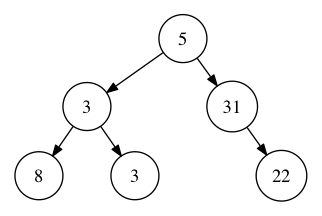

In [12]:
Image("junk.png")

In [29]:
!cat treeplot.sh

#!/bin/sh
dot $1.dot | gvpr -c -ftree.gv | neato -n -Tpng -o $1.png


In [30]:
!cat tree.gv

BEGIN {
  double tw[node_t];    // width of tree rooted at node
  double nw[node_t];    // width of node
  double xoff[node_t];  // x offset of root from left side of its tree
  double sp = 36;       // extra space between left and right subtrees
  double wd, w, w1, w2; 
  double x, y, z;
  edge_t e1, e2;
  node_t n;
}
BEG_G {
  $.bb = "";
  $tvtype=TV_postfwd;   // visit root after all children visited
}
N {
  sscanf ($.width, "%f", &w);
  w *= 72;  // convert inches to points
  nw[$] = w;
  if ($.outdegree == 0) {
    tw[$] = w;
    xoff[$] = w/2.0;
  }
  else if ($.outdegree == 1) {
    e1 = fstout($);
    w1 = tw[e1.head];    
    tw[$] = w1 + (sp+w)/2.0;
    if (e1.side == "left")
      xoff[$] = tw[$] - w/2.0;
    else
      xoff[$] = w/2.0;
  }
  else {
    e1 = fstout($);
    w1 = tw[e1.head];    
    e2 = nxtout(e1);
    w2 = tw[e2.head];    
    wd = w1 + w2 + sp;
    if (w > wd)
      wd = w;
    tw[$] = wd;
    xoff[$] = w1 + sp/2.0;
  }
}
BEG_G {
  $tvtype=TV_fwd;   // vis

### Lexing

In [13]:
import string
#some code from composing programs
_WHITESPACE = set(' \t\n\r')
_NUMERAL_STARTS = set(string.digits) | set('+-.')
_SINGLE_CHAR_TOKENS = set("()")
_TOKEN_END = _WHITESPACE | _SINGLE_CHAR_TOKENS
_SYMBOL_STARTS = set('%*/+-^') 
_SYMBOL_INNERS = set(string.digits) | set('+-.')

def next_token(expression, pos):
    while pos < len(expression):
        c = expression[pos]
        if c in _WHITESPACE:
            pos += 1
        elif c in _SINGLE_CHAR_TOKENS:
            #print(">c",c)
            return c, (pos + 1)
        else:#a numerical expression or operator
            j = pos
            while j < len(expression) and expression[j] not in _TOKEN_END:
                j += 1
            #print('c>',expression[pos:j])
            return expression[pos:j], min(j, len(expression))
    return None, len(expression)

def valid_symbol(s):
    if len(s) == 0 or s not in _SYMBOL_STARTS:
        return False
    return True

def lex(expression):
    """
    An expression parser
    
    >>> lex('(+ 1 (* 23 3))')
    ['(', '+', 1, '(', '*', 23, 3, ')', ')']
    >>> lex('(+ 1 (* 23 -3))')
    ['(', '+', 1, '(', '*', 23, -3, ')', ')']
    >>> lex('(+ 1 (* 23 -3e03))')
    ['(', '+', 1, '(', '*', 23, -3000.0, ')', ')']
    >>> lex('(+ (* 2 3) (* 23 3))')
    ['(', '+', '(', '*', 2, 3, ')', '(', '*', 23, 3, ')', ')']
    """
    elen = len(expression)
    tokens=[]
    text, i = next_token(expression, 0)
    while text is not None:
        #print(text, expression)
        if text in _SINGLE_CHAR_TOKENS:
            tokens.append(text)
        elif text[0] in _SYMBOL_STARTS and valid_symbol(text):
            tokens.append(text)
        elif text[0] in _NUMERAL_STARTS:
            try:
                tokens.append(int(text))
            except ValueError:
                try:
                    tokens.append(float(text))
                except ValueError:
                    raise ValueError("invalid numeral: {0}".format(text))
        
        text, i = next_token(expression, i)
    return tokens

In [14]:
lex('(+ (* 2 3) (* 23 3))')

['(', '+', '(', '*', 2, 3, ')', '(', '*', 23, 3, ')', ')']

In [15]:
from doctest import run_docstring_examples as dtest
dtest(lex, globals(), verbose=True)

Finding tests in NoName
Trying:
    lex('(+ 1 (* 23 3))')
Expecting:
    ['(', '+', 1, '(', '*', 23, 3, ')', ')']
ok
Trying:
    lex('(+ 1 (* 23 -3))')
Expecting:
    ['(', '+', 1, '(', '*', 23, -3, ')', ')']
ok
Trying:
    lex('(+ 1 (* 23 -3e03))')
Expecting:
    ['(', '+', 1, '(', '*', 23, -3000.0, ')', ')']
ok
Trying:
    lex('(+ (* 2 3) (* 23 3))')
Expecting:
    ['(', '+', '(', '*', 2, 3, ')', '(', '*', 23, 3, ')', ')']
ok


### Syntactic Analysis 

...to get the tree..

In [16]:
def syn(tokens):
    currentTree = None
    stack = []
    for i, c in enumerate(tokens):
        if c == '(':
            if currentTree is not None:
                if currentTree.left is None:
                    ntree = currentTree.addLeftChild(tokens[i+1])
                else:
                    ntree = currentTree.addRightChild(tokens[i+1])
            else:
                ntree = BinaryTree(tokens[i+1])
            stack.append(ntree)
            currentTree = ntree
        elif c in _SYMBOL_STARTS:
            assert currentTree.value == c, "op should follow ("
        elif c not in _SYMBOL_STARTS | _SINGLE_CHAR_TOKENS: #number
            if currentTree.left is None:
                leaf = currentTree.addLeftChild(c)
            else:
                leaf = currentTree.addRightChild(c)
        elif c==')':
            if len(stack) > 1:
                stack.pop()
            currentTree=stack[-1]
    stack.pop()
    return currentTree

In [17]:
t = syn(lex('(+ (* 2 3) (* 23 3))'))

In [18]:
t.value, t.left.value, t.right.value

('+', '*', '*')

In [19]:
syn(lex('(+ 1 (* 23 3))'))

In [20]:
syn(lex('(+ (* 2 3) (* 23 3))'))

In [21]:
plotbtree(syn(lex('(+ (* 2 3) (* 23 3))')), 'exptree')

In [22]:
!cat exptree.dot


    digraph G {
    nodesep=0.3;
    ranksep=0.2;
    margin=0.1;
    node [shape=circle];
    edge [arrowsize=0.8];
    "516f758e-8d7f-4915-8578-df7db7464755" -> "86bbfc6c-2874-4319-b091-cdc087559263"[side=left];
"86bbfc6c-2874-4319-b091-cdc087559263" -> "465e9946-333e-4f11-92e4-7568ced4ee7b"[side=left];
"86bbfc6c-2874-4319-b091-cdc087559263" -> "af894423-0b2a-4c76-94b5-7ae659240352"[side=right];
"516f758e-8d7f-4915-8578-df7db7464755" -> "f7134db6-8672-42db-8f32-09b00e792b8e"[side=right];
"f7134db6-8672-42db-8f32-09b00e792b8e" -> "e55ddeeb-04d5-4f73-8c1b-f6b5c5725545"[side=left];
"f7134db6-8672-42db-8f32-09b00e792b8e" -> "a3edd88f-1d3a-481d-b161-38bed2e70cc0"[side=right];
"86bbfc6c-2874-4319-b091-cdc087559263"[label="*"]
"516f758e-8d7f-4915-8578-df7db7464755"[label="+"]
"a3edd88f-1d3a-481d-b161-38bed2e70cc0"[label="3"]
"f7134db6-8672-42db-8f32-09b00e792b8e"[label="*"]
"465e9946-333e-4f11-92e4-7568ced4ee7b"[label="2"]
"e55ddeeb-04d5-4f73-8c1b-f6b5c5725545"[label="23"]
"af894423-0b2a-4

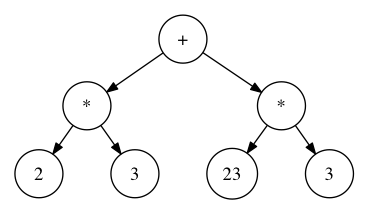

In [23]:
Image('exptree.png')

### Tree traversal

We need to decide how we plan to tracerse the tree. There are 3 choices, based on **an implicit ordering** of the tree from left to right

- In-order: visit left-subtree, then current node, then right sub tree
- Post-order: do child nodes first, and then current node
- Pre-order: do current node, then children

By visit ot do i mean the execution of some operation. For example, consider the filesystem tree. Order does not matter there, but say removing files in a directory before remoc=ving a directory makes sense: this is post-order. similarly to find size of a folder.

Pre-order is rarely used (although we did use it to write a pre-order iterator for the binary tree just now to output stuff in the dot language).

In [24]:
def preorder_traverse(tree, func):
    if tree:
        func(tree.value)
        preorder_traverse(tree.left, func)
        preorder_traverse(tree.right, func)
def inorder_traverse(tree, func):
    if tree:
        inorder_traverse(tree.left, func)
        func(tree.value)
        inorder_traverse(tree.right, func)
def postorder_traverse(tree, func):
    if tree:
        r1=postorder_traverse(tree.left, func)
        r2=postorder_traverse(tree.right, func)
        return func(tree.value, r1, r2)

Ok, so lets support some simple ops...by delegating our "languages" ops to python :-)

In [25]:
from operator import add, sub, mul, pow, mod, truediv
OPDICT={
    '+': add,
    '-': sub,
    '*': mul,
    '/': truediv,
    '%': mod,
    '^': pow
}
def eval_exp(v, x, y):
    if x is not None and y is not None:
        return OPDICT[v](x,y)
    else:
        return v

In [26]:
postorder_traverse(syn(lex('(+ 1 (* 23 3))')), eval_exp)

70

In [27]:
postorder_traverse(syn(lex('(+ 1 (* 23 (/ 1 .3)))')), eval_exp)

77.66666666666667

In [28]:
postorder_traverse(syn(lex('(+ (* 2 3) (* 23 3))')), eval_exp)

75